#### Шаг 1. Загружаем данные 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn import metrics
#import xgboost as xgb
#from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

/usr/lib/python3/dist-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/lib/python3/dist-packages/dask/dataframe/utils.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/usr/lib/python3/dist-packages/dask/dataframe/utils.py:362: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/usr/lib/python3/dist-packages/dask/dataframe/utils.py:362: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _

In [2]:
#!pip3 install lightgbm
lgb.__version__

'3.3.3'

In [3]:
path = r'Source'
os.chdir(path)

In [4]:
dataset = pd.read_csv('dataset_prepared_new.csv')
dataset.head(2)

,Толщина проката,Ширина проката,"Вес рулона, т",Номер моталки,"Вес проката, произведенного в одной ширине",Длина с начала кампании рабочих валков (М12-02),Калорийность высшая,Температура посада,Время нагрева,Время нахождения сляба в сварочной зоне,...,Время нагрева в зоне нагрева 1,Время нагрева в зоне нагрева 2,Время нагрева в зоне выравнивания,Признак включения гидросбива за окалиноломателем,Уставка на Т5 (min).1,№ строки акта,Номер бригады,"Толщина назначения, мм",В800 (Тл) Эпштейн худший,"P1,7/50 (Вт / Кг) Эпштейн худший"
0,2.5,1055.0,19.54,1.0,0.0,64.19,0.0,696.0,3.89,34.927578,...,36.035531,35.863634,28.423571,1.0,1060.0,1.620211e+21,1.0,0.27,1.88,0.99
1,2.5,1055.0,19.54,1.0,0.0,64.19,0.0,696.0,3.89,34.927578,...,36.035531,35.863634,28.423571,1.0,1060.0,1.620211e+21,1.0,0.27,1.89,0.99


In [5]:
for col in dataset.columns:
    #print(col)
    if 'Признак' in col:
        print('')
        print(col)
        print('')


Признак включения экранов


Признак работы PFC


Признак работы DPC


Признак работы САРТ


Признак включения гидросбива за 1-ой клетью


Признак включения гидросбива за 2-ой клетью


Признак включения гидросбива перед 4-й клетью


Признак включения гидросбива перед 5-й клетью


Признак неработающих полусекций на полосе (1-80)


Признак работы RM-312


Признак ручного вмешательства в работу системы PFC в режиме C" в клети 8"


Признак ручного вмешательства в работу системы PFC в режиме C" в клети 9"


Признак ручного вмешательства в работу системы PFC в режиме C" в клети 10"


Признак включения коррекции заправочной скорости по Т5


Признак включения гидросбива перед  чистовой группой


Признак использования дублирующего пирометра T12


Признак ручного вмешательства в работу системы PFC в режиме C" в клети 7"


Признак ручного вмешательства в работу системы PFC в режиме C" в клети 11"


Признак ручного вмешательства в работу системы PFC в режиме C" в клети 12"


Признак деления раскат

In [6]:
dataset.loc[dataset['Признак неработающих полусекций на полосе (1-80)']>0, 'Признак неработающих полусекций на полосе (1-80)'] = 1
dataset['Признак неработающих полусекций на полосе (1-80)']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
124735    0.0
124736    0.0
124737    0.0
124738    0.0
124739    0.0
Name: Признак неработающих полусекций на полосе (1-80), Length: 124740, dtype: float64

In [7]:
dataset['Время нахождения сляба в томильной зоне']

0         35.981674
1         35.981674
2         35.981674
3         35.981674
4         35.981674
            ...    
124735    29.000000
124736    29.000000
124737    29.000000
124738    29.000000
124739    29.000000
Name: Время нахождения сляба в томильной зоне, Length: 124740, dtype: float64

In [8]:
dataset['Толщина назначения, мм']

0         0.27
1         0.27
2         0.27
3         0.27
4         0.27
          ... 
124735    0.27
124736    0.27
124737    0.27
124738    0.27
124739    0.27
Name: Толщина назначения, мм, Length: 124740, dtype: float64

In [9]:
dataset = dataset[dataset['Толщина назначения, мм']==0.27]

<AxesSubplot:>

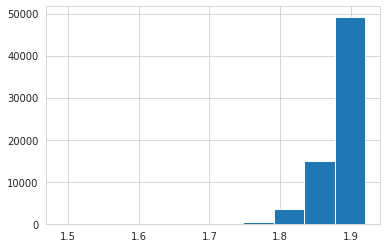

In [10]:
dataset['В800  (Тл) Эпштейн худший'].hist()

<AxesSubplot:>

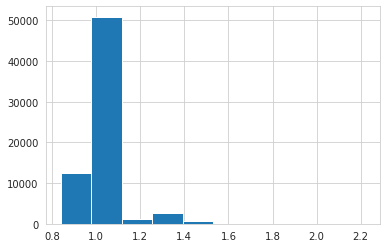

In [11]:
dataset['P1,7/50  (Вт / Кг) Эпштейн худший'].hist()

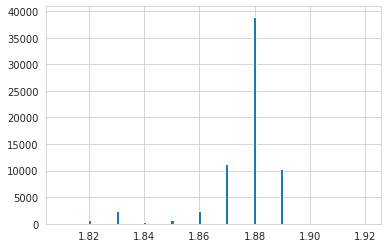

In [12]:
dataset[dataset['В800  (Тл) Эпштейн худший']>1.8]['В800  (Тл) Эпштейн худший'].hist(bins=100)
plt.show()

In [13]:
dataset['В800  (Тл) Эпштейн худший'].value_counts()

1.88    38953
1.87    11205
1.89    10258
1.83     2467
1.86     2399
1.85      794
1.82      659
1.84      423
1.81      187
1.80      124
1.79      108
1.78       86
1.77       59
1.76       47
1.75       44
1.74       41
1.72       27
1.73       26
1.90       23
1.69       16
1.71       15
1.70       10
1.68       10
1.63        5
1.65        3
1.64        3
1.60        2
1.62        2
1.67        2
1.58        2
1.59        1
1.66        1
1.49        1
1.91        1
1.92        1
Name: В800  (Тл) Эпштейн худший, dtype: int64

#### Шаг 2. Готовим данные под тренировку модели ML. В800  (Тл) Эпштейн худший

In [14]:
good_cols = ['Толщина проката',
             'Ширина проката',
             'Вес рулона, т',
             'Температура посада',
             'Время нагрева',
             'Среднее значение температуры за 5 клетью (М12-02)',
             'Скорость клети №6 (в момент входа в 12 клеть)',
             'Время нахождения сляба в сварочной зоне',
             'Время нахождения сляба в томильной зоне',
             'Температура воды для душирования',
             'Температура воды в системе охлаждения рабочих валков',
             'Время нахождения полосы на промрольганге',
             'Время нагрева в зоне рекуперации',
             'Время нагрева в зоне предварительного нагрева',
             'Время нагрева в зоне нагрева 1',
             'Время нагрева в зоне нагрева 2',
             'Время нагрева в зоне выравнивания',
             'Признак включения гидросбива за 1-ой клетью',
             'Признак включения гидросбива за 2-ой клетью',
             'Признак включения гидросбива перед 4-й клетью',
             'Признак включения гидросбива перед 5-й клетью',
             'В800  (Тл) Эпштейн худший',
             ]
good_cols = dataset.columns[:-5]
dataset[good_cols]

,Толщина проката,Ширина проката,"Вес рулона, т",Номер моталки,"Вес проката, произведенного в одной ширине",Длина с начала кампании рабочих валков (М12-02),Калорийность высшая,Температура посада,Время нагрева,Время нахождения сляба в сварочной зоне,...,Корректировка на сляб по целевой температуре выгрузки,Прикромочная клиновидность со стороны привода (среднее),Прикромочная клиновидность со стороны обслуживания (среднее),Время нагрева в зоне рекуперации,Время нагрева в зоне предварительного нагрева,Время нагрева в зоне нагрева 1,Время нагрева в зоне нагрева 2,Время нагрева в зоне выравнивания,Признак включения гидросбива за окалиноломателем,Уставка на Т5 (min).1
0,2.5,1055.0,19.54,1.0,0.0,64.190,0.0,696.0,3.89,34.927578,...,0.0,88.2,49.7,77.042114,44.252546,36.035531,35.863634,28.423571,1.0,1060.0
1,2.5,1055.0,19.54,1.0,0.0,64.190,0.0,696.0,3.89,34.927578,...,0.0,88.2,49.7,77.042114,44.252546,36.035531,35.863634,28.423571,1.0,1060.0
2,2.5,1055.0,19.54,1.0,0.0,64.190,0.0,696.0,3.89,34.927578,...,0.0,88.2,49.7,77.042114,44.252546,36.035531,35.863634,28.423571,1.0,1060.0
3,2.5,1055.0,19.54,1.0,0.0,64.190,0.0,696.0,3.89,34.927578,...,0.0,88.2,49.7,77.042114,44.252546,36.035531,35.863634,28.423571,1.0,1060.0
4,2.5,1055.0,19.54,1.0,0.0,64.190,0.0,696.0,3.89,34.927578,...,0.0,88.2,49.7,77.042114,44.252546,36.035531,35.863634,28.423571,1.0,1060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124735,2.5,1070.0,20.10,2.0,762.0,94.468,8770.0,593.0,3.57,40.000000,...,0.0,92.6,100.6,84.000000,35.000000,32.000000,40.000000,23.000000,1.0,1060.0
124736,2.5,1070.0,20.10,2.0,762.0,94.468,8770.0,593.0,3.57,40.000000,...,0.0,92.6,100.6,84.000000,35.000000,32.000000,40.000000,23.000000,1.0,1060.0
124737,2.5,1070.0,20.10,2.0,762.0,94.468,8770.0,593.0,3.57,40.000000,...,0.0,92.6,100.6,84.000000,35.000000,32.000000,40.000000,23.000000,1.0,1060.0
124738,2.5,1070.0,20.10,2.0,762.0,94.468,8770.0,593.0,3.57,40.000000,...,0.0,92.6,100.6,84.000000,35.000000,32.000000,40.000000,23.000000,1.0,1060.0


In [15]:
good_cols[-1]
target = dataset.columns[-1]
target

'P1,7/50  (Вт / Кг) Эпштейн худший'

In [16]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                                                               "There are " + str(mis_val_table_ren_columns.shape[0]) +
           " columns that have missing values.")
    return mis_val_table_ren_columns

In [17]:
missing_values_table(dataset)

Your selected dataframe has 298 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [18]:
#y = dataset['В800  (Тл) Эпштейн худший']
#dataset.drop(columns=['В800  (Тл) Эпштейн худший'], inplace=True)
X, X_test, y, y_test= train_test_split(dataset[good_cols],dataset[target],test_size=0.3, random_state=41)
#X, X_test, y, y_test= train_test_split(dataset[good_cols[:-1]],dataset[good_cols[-1]],test_size=0.3, random_state=41)

## Linear Regression

In [19]:
from sklearn.linear_model import Lasso
reg=Lasso(alpha=0.001)
reg.fit(X, y)
r_pred = reg.predict(X_test)
mae = mean_absolute_error(r_pred,y_test)
mape = mean_absolute_percentage_error(r_pred,y_test)
reg_feat=pd.DataFrame()
reg_feat['coef']=reg.coef_*1000
reg_feat['name']=X.columns
reg_feat.sort_values(by=['coef'],ascending=False, inplace=True)
reg_feat

,coef,name
237,0.786789,Средний зазор вертикальных валков клети №1 (1 ...
195,0.476552,(СОВ) Задание на расход воды для клети 6
140,0.362993,Оценка неплоскостности полосы за клетью 08
292,0.307116,Уставка на Т5 (min).1
16,0.279083,"Процент длины полосы, превысившей заданный НД ..."
...,...,...
70,-0.539449,Температура воды для душирования
72,-0.589756,Давление в системе гидросбивов
67,-0.793189,Соотношение выпуклости и клиновидности
12,-0.825868,Среднее значение температуры за 5 клетью (М12-02)


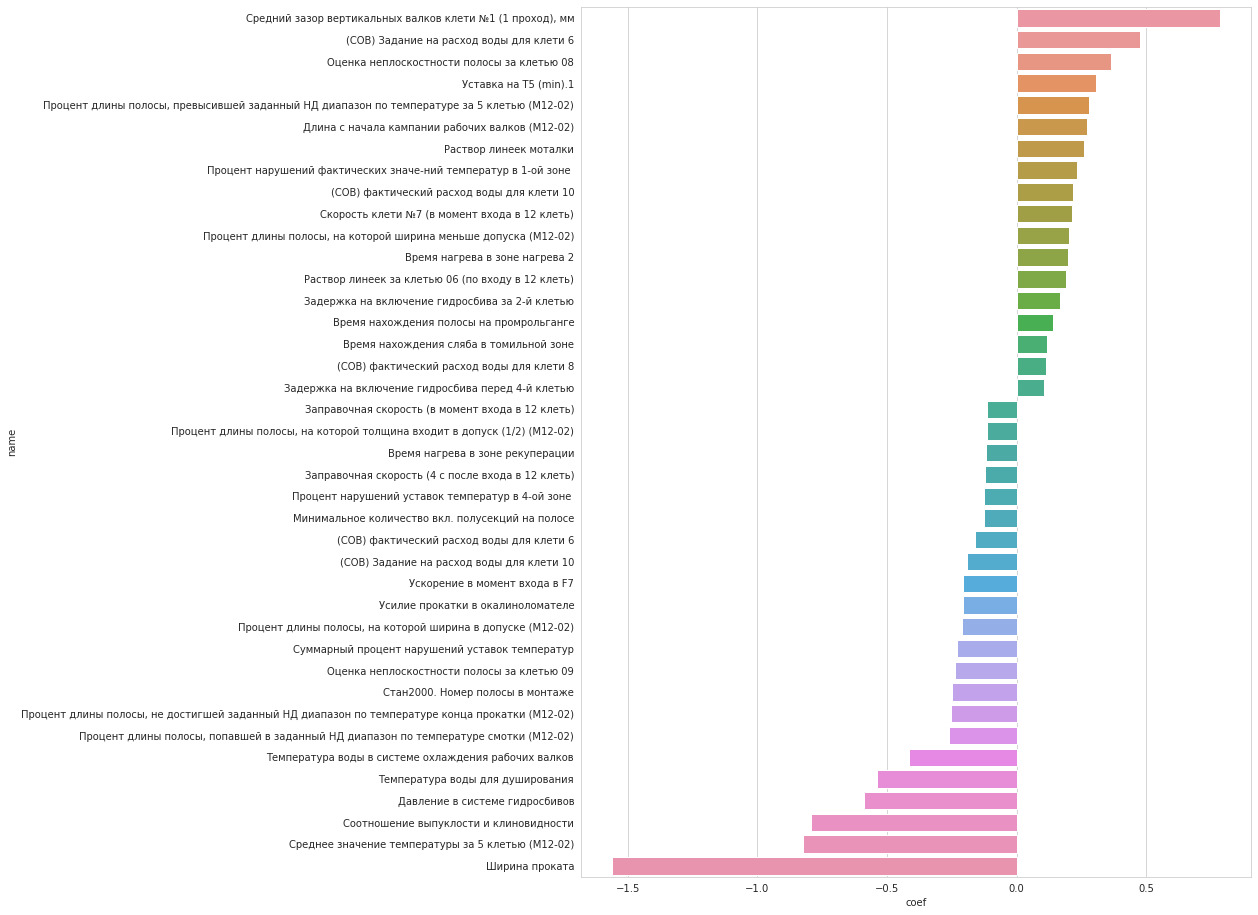

In [20]:
plt.figure(figsize=(12,16))
sns.barplot(reg_feat[abs(reg_feat['coef'])>0.1]['coef'], reg_feat[abs(reg_feat['coef'])>0.1]['name'])
sns.set(font_scale= 1.5)
plt.show()

In [21]:
#reg_feat[abs(reg_feat['coef'])>0.01].to_excel('lasso_for_B.xlsx', encoding='utf-8-sig', index=False)
reg_feat[abs(reg_feat['coef'])>0.1]

,coef,name
237,0.786789,Средний зазор вертикальных валков клети №1 (1 ...
195,0.476552,(СОВ) Задание на расход воды для клети 6
140,0.362993,Оценка неплоскостности полосы за клетью 08
292,0.307116,Уставка на Т5 (min).1
16,0.279083,"Процент длины полосы, превысившей заданный НД ..."
5,0.271128,Длина с начала кампании рабочих валков (М12-02)
49,0.259575,Раствор линеек моталки
258,0.233348,Процент нарушений фактических значе-ний темпер...
87,0.217595,(СОВ) фактический расход воды для клети 10
174,0.214625,Скорость клети №7 (в момент входа в 12 клеть)


In [22]:
mae, mape

(0.04689503155456444, 0.04553368355203399)

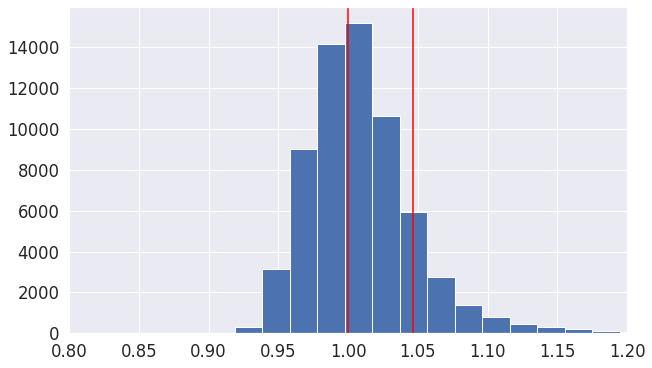

In [23]:
plt.figure(figsize=(10,6))
#dataset[dataset['В800  (Тл) Эпштейн худший']>1.8]['В800  (Тл) Эпштейн худший'].hist(bins=10)
dataset[target].hist(bins=70)
plt.axvline(1.0, color='red')
plt.axvline(1.0+mae, color='red')
plt.xlim(0.8, 1.2)

plt.show()

In [24]:
range_ = (dataset[target]>0.8) & (dataset[target]<1.2)
mean = dataset[range_][target].mean()
std = dataset[range_][target].std()
print(target+'\t', '\nmean:',mean, '\n2std:',2*std, '\n2mae:', 2*mae)

P1,7/50  (Вт / Кг) Эпштейн худший	 
mean: 1.0065302101915767 
2std: 0.07624489184768367 
2mae: 0.09379006310912888


In [25]:
dataset[target].unique()

array([0.99, 1.  , 1.03, 1.01, 0.97, 0.96, 1.02, 1.04, 1.2 , 1.3 , 1.05,
       0.95, 1.06, 1.07, 1.21, 1.16, 1.13, 0.98, 1.09, 1.1 , 1.12, 1.33,
       1.24, 1.37, 1.25, 1.15, 1.08, 1.11, 1.27, 1.4 , 1.23, 1.14, 1.58,
       1.17, 1.19, 1.54, 1.63, 0.94, 1.53, 1.61, 1.35, 1.74, 1.57, 1.28,
       1.45, 1.41, 1.48, 1.51, 1.18, 1.29, 1.22, 1.38, 1.43, 1.46, 1.31,
       1.42, 1.55, 1.66, 1.34, 1.39, 1.44, 1.68, 1.52, 0.93, 1.36, 1.47,
       1.71, 1.5 , 1.87, 2.08, 1.6 , 1.64, 1.7 , 1.32, 1.26, 2.22, 1.56,
       1.49, 1.67, 2.09, 2.12, 1.59, 1.81, 2.03, 1.9 , 1.62, 1.82, 1.76,
       1.69, 2.18, 2.02, 1.72, 0.92, 1.97, 2.06, 1.84, 2.19, 0.91, 1.93,
       0.9 , 0.87, 0.86, 0.84, 0.85, 0.88])

### Random Forest

In [36]:
X, X_test, y, y_test= train_test_split(dataset[good_cols],dataset[target],test_size=0.3, random_state=41)

In [37]:
RndFrst = RandomForestRegressor(n_estimators=2000, random_state=42)

In [38]:
dataset[X.columns[:178][-1]]

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
124735    0.0
124736    0.0
124737    0.0
124738    0.0
124739    0.0
Name: Признак неработающих полусекций на полосе (1-80), Length: 68005, dtype: float64

In [ ]:
RndFrst.fit(X, y)
# rndf_pred = rndfrst.predict(X_test.fillna(0))
# mae_rndf = mean_absolute_error(rndf_pred, y_test.fillna(0))

In [40]:
rndf_pred = RndFrst.predict(X_test.fillna(0))
mae_rndf = mean_absolute_error(rndf_pred, y_test.fillna(0))

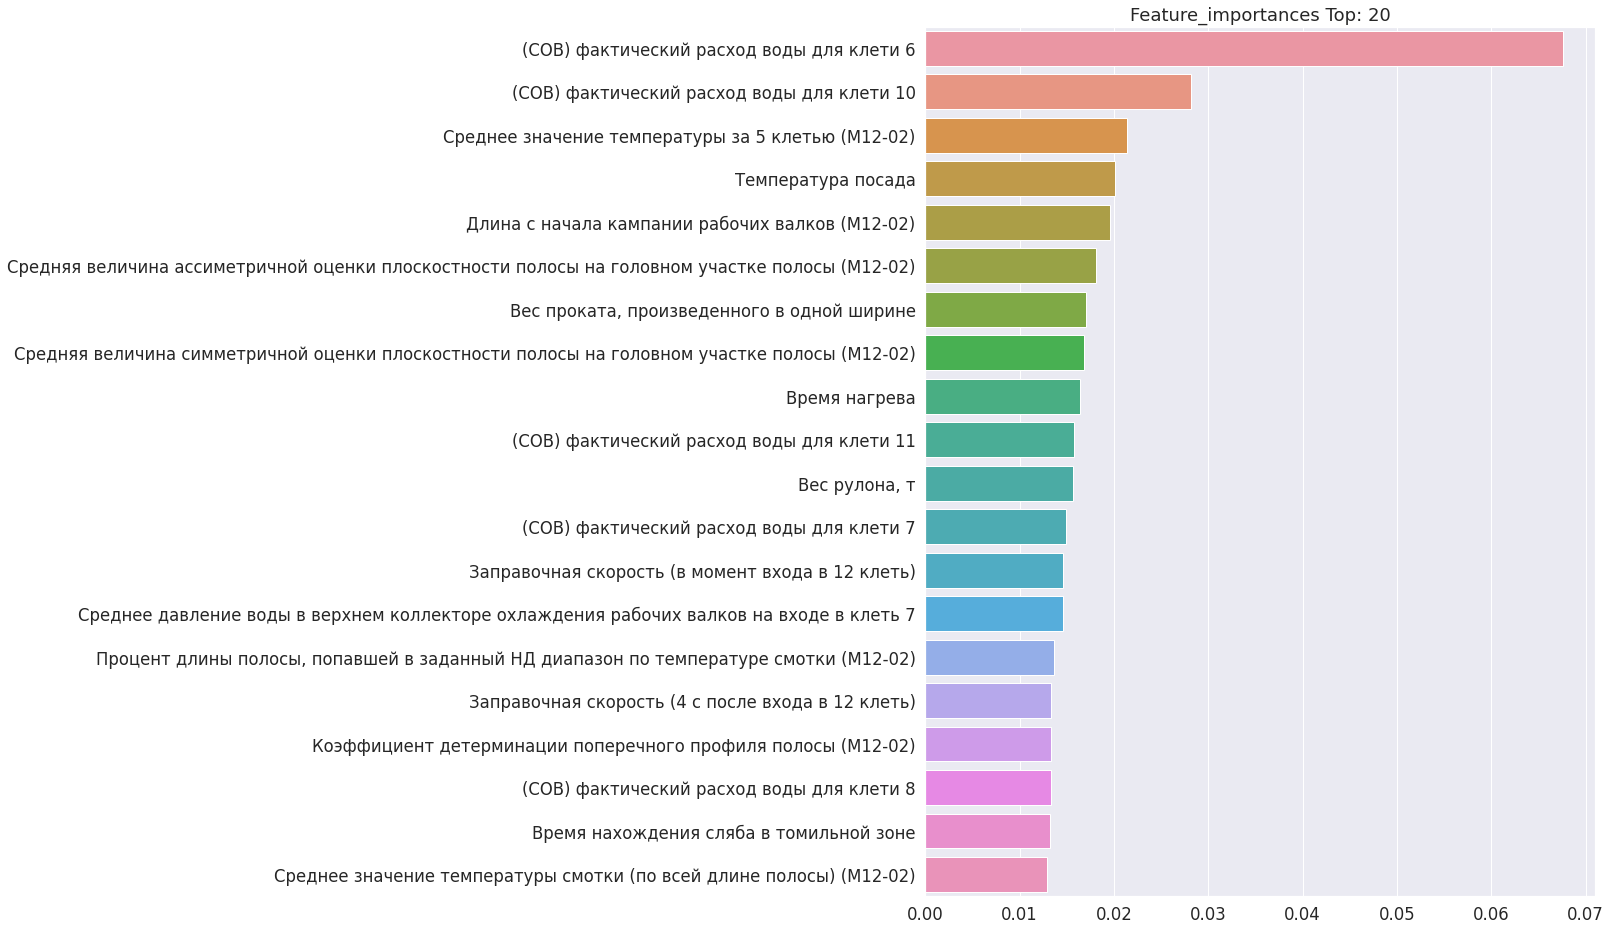

In [62]:
plt.figure(figsize=(12,16))
sns.set(font_scale= 1.5)
num_top = 20
feature_importances = pd.DataFrame(RndFrst.feature_importances_.reshape(1,X_test.shape[1]), columns=X_test.columns)
feature_top = feature_importances.T.sort_values(0, ascending=False)[:num_top]
sns.barplot(x=feature_top.values.reshape(1,num_top)[0], y=feature_top.index)
plt.title('Feature_importances Top: {}'.format(num_top))
plt.show()

In [63]:
mae_rndf

0.039776113096225474

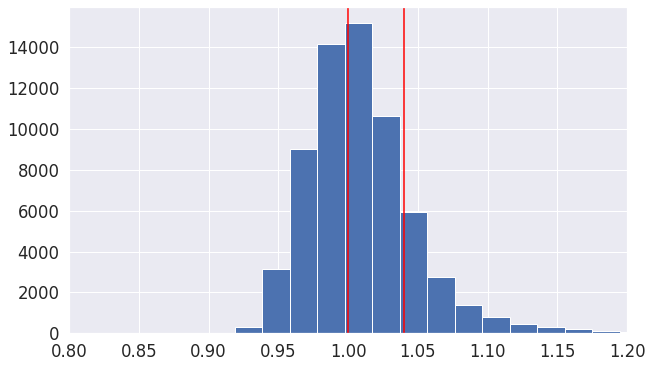

In [64]:
plt.figure(figsize=(10,6))
#dataset[dataset['В800  (Тл) Эпштейн худший']>1.8]['В800  (Тл) Эпштейн худший'].hist(bins=10)
dataset[target].hist(bins=70)
plt.axvline(1.0, color='red')
plt.axvline(1.0+mae_rndf, color='red')
plt.xlim(0.8, 1.2)

plt.show()

In [65]:
range_ = (dataset[target]>0.8) & (dataset[target]<1.2)
mean = dataset[range_][target].mean()
std = dataset[range_][target].std()
print(target+'\t', '\nmean:',mean, '\n2std:',2*std, '\n2mae:', 2*mae_rndf)

P1,7/50  (Вт / Кг) Эпштейн худший	 
mean: 1.0065302101915767 
2std: 0.07624489184768367 
2mae: 0.07955222619245095


In [ ]:
X, X_test, y, y_test

In [ ]:
df = dataset.copy()

In [ ]:
column_names_lst = list(df.columns.values)

In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=column_names_lst)
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

In [ ]:
df = df_scaled.copy()

In [ ]:
df = df.drop(columns=['P1,7/50  (Вт / Кг) Эпштейн худший'])
dataset.head(2)

In [ ]:
y = df['В800  (Тл) Эпштейн худший']
X = df.drop('В800  (Тл) Эпштейн худший', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

In [ ]:
#making dictionary of models
models = {
    'LassoRegression': Lasso(),
    #'KNeighborsRegressor': KNeighborsRegressor(),
    'XGBRegressor': XGBRegressor(),
    #'RandomForestRegressor': RandomForestRegressor()
}

In [ ]:
model_R2 = []
model_MAE = []
model_MSE = []
model_RMSE = []
model_names = []

for name, model in models.items():
    print("one")
    a = model.fit(X_train,y_train)
    y_pred = a.predict(X_test)
    
    R2 = metrics.r2_score(y_test, y_pred)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    model_R2.append(R2)
    model_MAE.append(MAE)
    model_MSE.append(MSE)
    model_RMSE.append(RMSE) 
    
    model_names.append(name)
    

    df_results = pd.DataFrame([model_names, model_R2, model_MAE, model_MSE, model_RMSE])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0: 'Model', 1: 'R2', 2: 'MAE', 3: 'MSE', 4: 'RMSE' }).sort_values(by='MSE',ascending=False)
    print("two")
df_results

#### Шаг 2b. Готовим данные под тренировку модели ML. P1,7/50  (Вт / Кг) Эпштейн худший

In [ ]:
df = df_scaled.copy()

In [ ]:
df = df.drop(columns=['В800  (Тл) Эпштейн худший'])
dataset.head(2)

In [ ]:
y = df['P1,7/50  (Вт / Кг) Эпштейн худший']
X = df.drop('P1,7/50  (Вт / Кг) Эпштейн худший', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

In [ ]:
#making dictionary of models
models = {
    'LassoRegression': Lasso(),
    #'KNeighborsRegressor': KNeighborsRegressor(),
    'XGBRegressor': XGBRegressor(),
    #'RandomForestRegressor': RandomForestRegressor()
}

In [ ]:
model_R2 = []
model_MAE = []
model_MSE = []
model_RMSE = []
model_names = []

for name, model in models.items():
    print("one")
    a = model.fit(X_train,y_train)
    y_pred = a.predict(X_test)
    
    R2 = metrics.r2_score(y_test, y_pred)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    model_R2.append(R2)
    model_MAE.append(MAE)
    model_MSE.append(MSE)
    model_RMSE.append(RMSE) 
    
    model_names.append(name)
    

    df_results = pd.DataFrame([model_names, model_R2, model_MAE, model_MSE, model_RMSE])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0: 'Model', 1: 'R2', 2: 'MAE', 3: 'MSE', 4: 'RMSE' }).sort_values(by='MSE',ascending=False)
    print("two")
df_results

#### Шаг 3. Проверяем Feature Importance

In [ ]:
df = df_scaled.copy()

In [ ]:
df = df.drop(columns=['В800  (Тл) Эпштейн худший'])
dataset.head(2)

In [ ]:
y = df['P1,7/50  (Вт / Кг) Эпштейн худший']
X = df.drop('P1,7/50  (Вт / Кг) Эпштейн худший', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

In [ ]:
features = list(X_train.columns.values)

In [ ]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha': [1e-2]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)



In [ ]:
lasso_regressor.fit(X_train, y_train)

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

In [ ]:
coefficients = lasso_regressor.best_estimator_.coef_

In [ ]:
coefficients